In [2]:
%matplotlib inline
import sticker
import fgsm
from utilities import query_to_labels, url_to_array
from glob import glob
from time import time
from os import remove
import numpy as np
from distill import create_distilled
import torch
from time import sleep
from sticker import sticker_attack

import matplotlib.pyplot as plt


In [3]:
def sticker_test(sticker_url,label):
    confsum=0
    confsum_base=0
    imlist = glob("Val_Delete!\\*")
    for imurl in imlist:
        conf=sticker_attack(imurl, "temp.png", sticker_url=sticker_url, mode="full", label=label)
        confsum += conf
        confb = query_to_labels(imurl)[label]
        print(confb)
        confsum_base += confb
        im = url_to_array ("temp.png")
        sleep(2)
    return(confsum/len(imlist),confsum_base/len(imlist))



#Save baseline once, exclude afterwards!!!
#Baseline for 25 images: 0.5831569316
device = torch.device('cuda:0')
model = create_distilled(device)

def fgsm_test(model,bounds=[5,25]):
    confsum_ad = {key:0 for key in bounds}
    times = {key:0 for key in bounds}
    a = fgsm.FGSM(model=model)
    a.print = False
    imlist = glob("Val_Delete!\\*")
    for bound in bounds:
        a.bound=bound
        times[bound]=time()
        for imurl in imlist:
            conf = a.simple_attack(imurl, "temp.png")
            confsum_ad[bound] += conv
            im = url_to_array ("temp.png")
            plt.imshow(im)
            plt.show()
            print(conf)
            sleep(12)
        times[bound] = time()-times[bound]
    try:
        remove("temp.png")
    except:
        pass
    
    for key in bounds: 
        print("average confidence for bound = " + str(key) + ": " + str(convsum_ad[key]/len(imlist)))
        print("time taken: " + str(times[key]) + " seconds")
    
    
    

In [5]:
print(sticker_test("8\\4_block8_0.011.0.png",8))
#Full 7 (0.13657913839999999, 0.020132955199999997)
#4 (0.89803308399999993, 0.020132955199999997)
#Full 2 (0.84138529279999996, 0.020132955199999997)
print(sticker_test("10\\4_block10_0.011.0.png",10))
#Full 7 (0.096575744399999996, 0.040076213200000002)
#4(0.95242675639999996, 0.040076213200000002)
# Full 2 (0.99946308159999997, 0.040076213200000002)
print(sticker_test("17\\4_block17_0.011.0.png",17))
#Full 7(0.63858146399999993, 0.13153478999999998)
#4 (0.73278707119999997, 0.13153478999999998)
# full 2(0.6413398092, 0.13153478999999998)
print(sticker_test("25\\4_block25_0.010.99999976.png",25))
#Full 7(0.41303497080000007, 0.10343631039999999)
#4 (0.74831928280000015, 0.10343631039999999)
# full 2(0.62279141000000016, 0.10343631039999999)

"""Queries:
812
236
30

"""

0.99999952
0.07406071
0.99947459
0.00224552
1.0
0.0
0.637676
0.0
0.92520624
0.0
0.99999535
0.0
0.99977642
0.0
0.952052
0.0
0.99992919
0.4198935
0.22526264
0.00712415
0.99448699
0.0
0.99938738
0.0
0.93127191
0.0
0.99924856
0.0
0.99999964
0.0
0.99999952
0.0
1.0
0.0
1.0
0.0
0.99999976
0.0
0.99994516
0.0
0.99999988
0.0
0.81271726
0.0
0.0
0.0
0.99999475
0.0
0.97440434
0.0
(0.89803308399999993, 0.020132955199999997)
1.0
0.0
0.9999994
0.0
0.99999988
0.0
0.9999882
0.0
0.99996376
0.0
1.0
0.0
1.0
0.20354502
0.99999869
0.0
0.9924534
0.0
0.82342058
0.0
0.99999988
0.0
0.99992621
0.0
0.99999881
0.0
0.99999928
0.0
1.0
0.0
1.0
0.0
1.0
0.0
1.0
0.0
0.99999964
0.0
0.99999774
0.0
0.99999964
0.0
0.86696488
0.00074943
0.12795916
0.0
0.99999976
0.00275236
1.0
0.79485852
(0.95242675639999996, 0.040076213200000002)
0.99995339
0.0
0.9999764
0.02335871
1.0
0.50275189
0.99999988
0.99667138
0.0213715
0.02272727
1.0
0.0
0.99980158
0.0
0.99999976
0.00219536
0.02272727
0.0
0.10364798
0.00120173
0.0
0.0
0.99958426
0.4

'Queries:\n812\n236\n30\n\n'

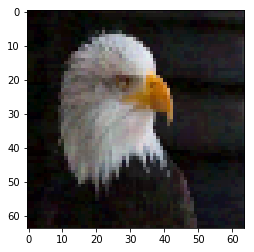

0.61236805


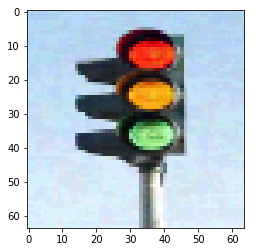

0.95862728


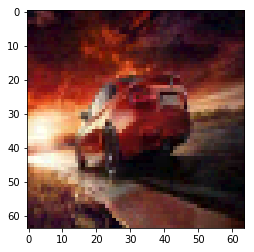

0.89748979


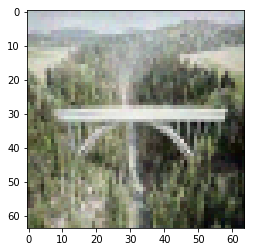

0.99957234


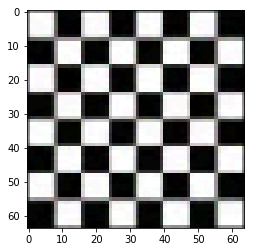

0.02272727


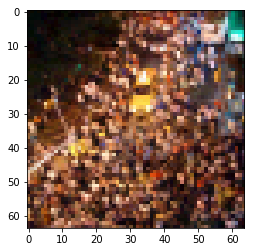

0.90999967


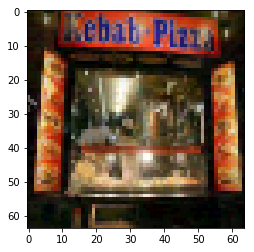

0.7638011


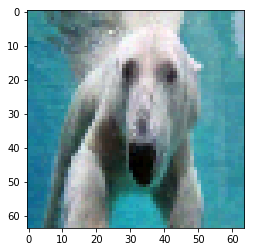

0.9629308


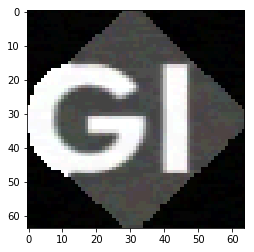

0.74155545


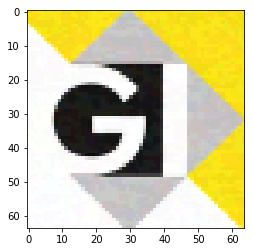

0.97923499


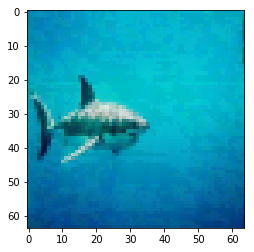

0.00493728


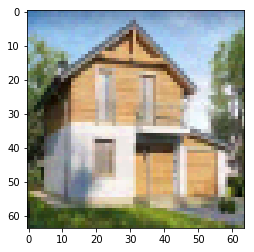

0.84540975


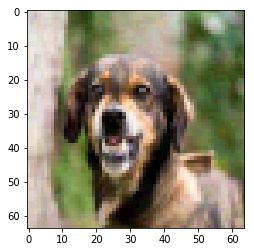

0.96554506


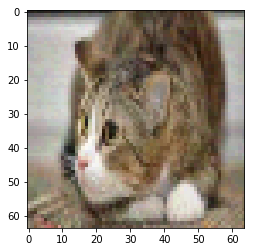

0.65639853


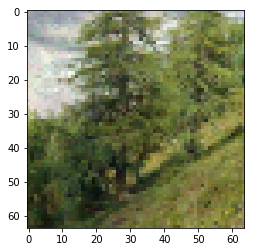

0.50598359


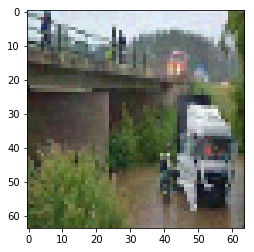

0.78831339


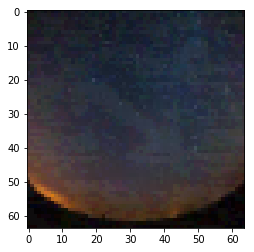

0.90607822


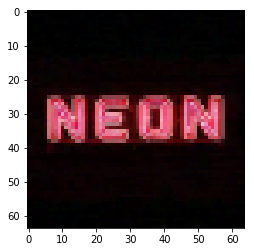

0.99735332


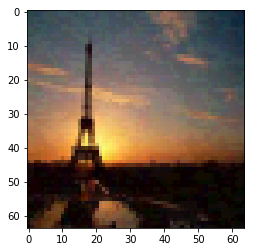

0.78535026


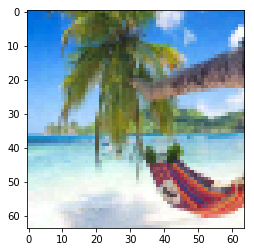

0.99991107


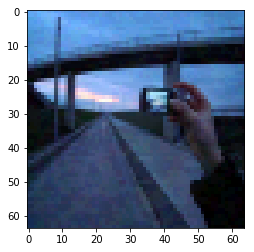

0.87442517


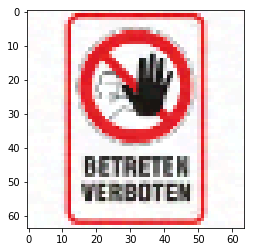

0.99372226


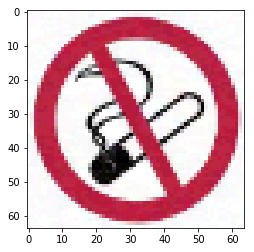

0.99017185


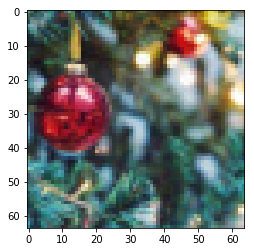

0.97332758


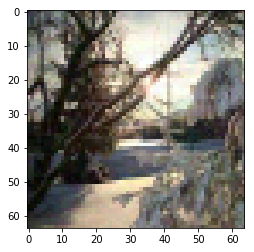

0.93814099


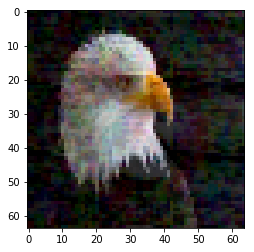

0.9778747


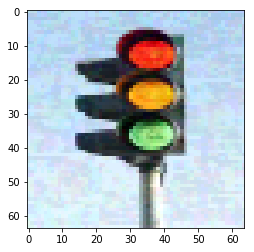

0.99482369


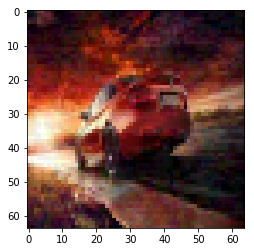

0.98998731


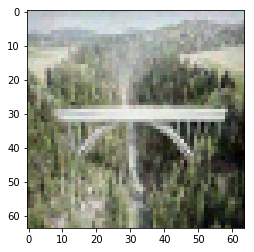

0.99958211


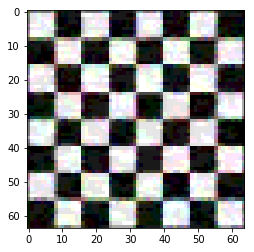

0.02272727


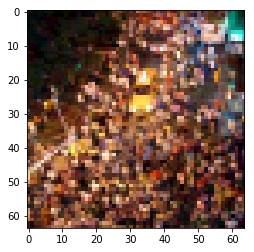

0.98694605


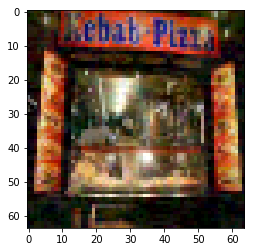

0.98821998


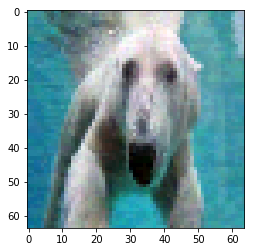

0.98335969


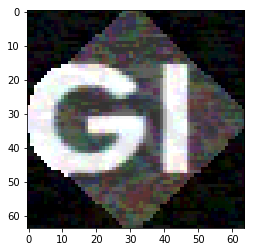

0.98914367


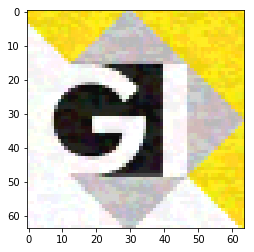

0.99191487


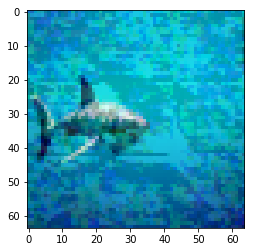

0.7075755


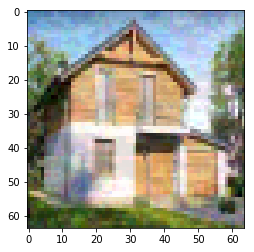

0.99343926


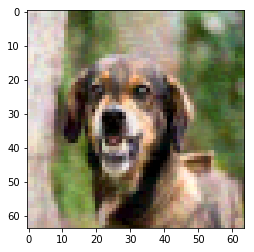

0.99105608


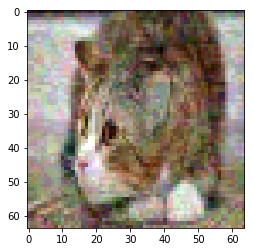

0.99176335


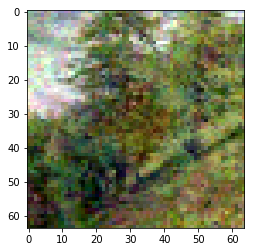

0.98333043


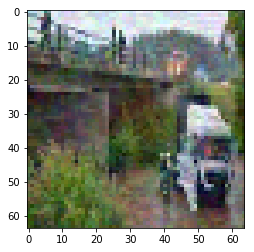

0.98528755


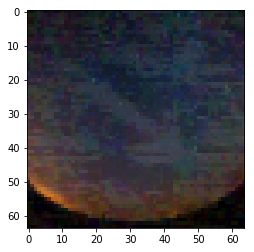

0.99164212


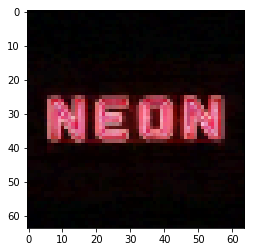

0.99821544


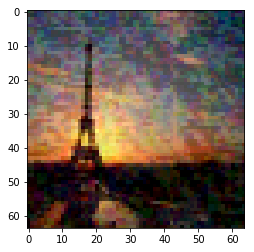

0.97295445


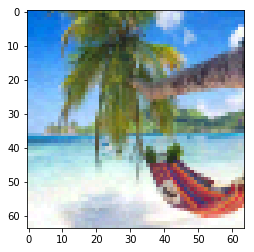

0.99996114


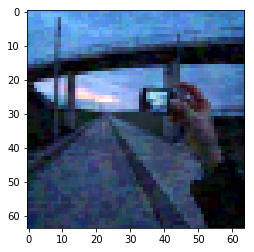

0.9938485


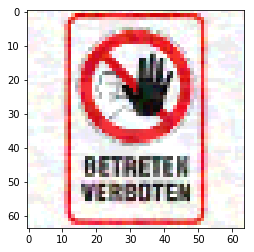

0.99989641


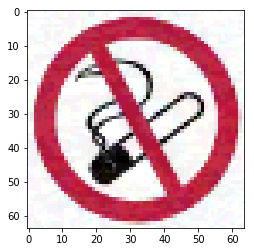

0.99776793


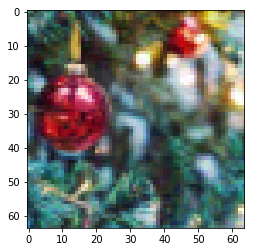

0.99518424


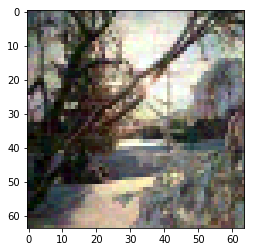

0.98665917
average confidence for bound = 5: 0.8029350024
time taken: 527.5956192016602 seconds
average confidence for bound = 25: 0.9405264364
time taken: 413.2708070278168 seconds


In [14]:
fgsm_test(model)

Val_Delete!\adler.png


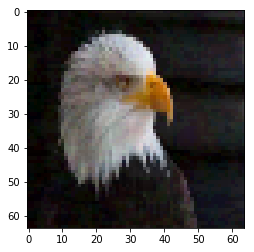

0.2432861
Val_Delete!\ampel.png


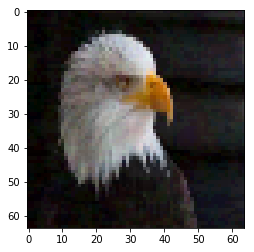

0.78029478
Val_Delete!\bmw.png


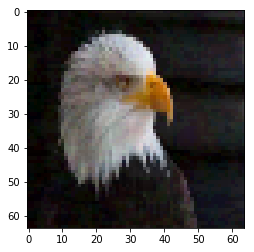

0.50275189
Val_Delete!\brücke.png


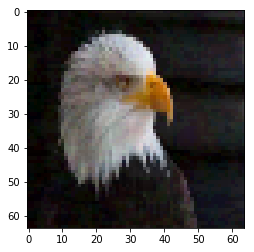

0.99667138
Val_Delete!\Chess.png


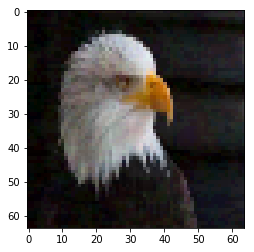

0.02272727
Val_Delete!\Crowd_in_street.png


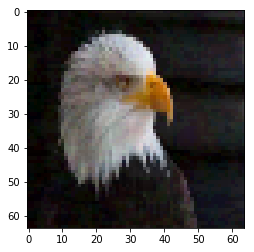

0.54367608
Val_Delete!\Döner.png


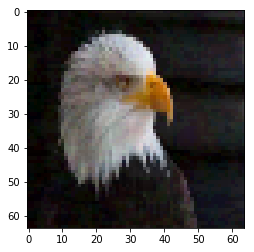

0.32026312
Val_Delete!\eisbär.png


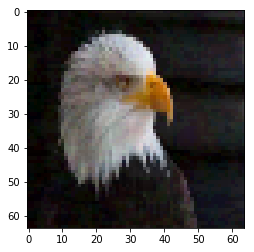

0.84093833
Val_Delete!\GI.png


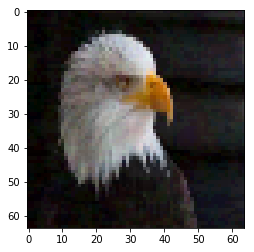

0.4198935
Val_Delete!\GI_2.png


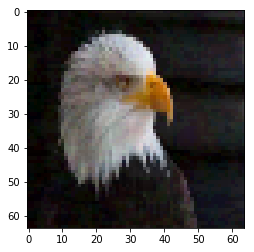

0.95854884
Val_Delete!\Hai.png


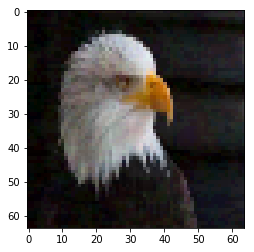

0.00151573
Val_Delete!\haus.png


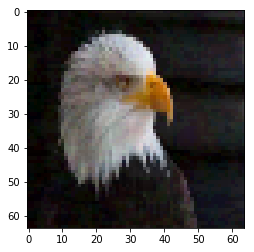

0.44644672
Val_Delete!\hund.png


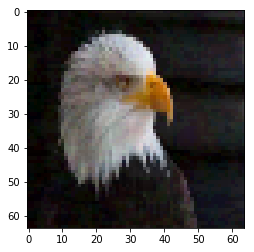

0.80691355
Val_Delete!\katze.png


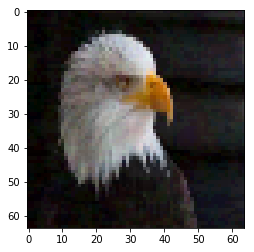

0.28220096
Val_Delete!\Larix_decidua_Aletschwald.png


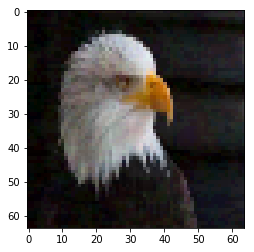

0.17504211
Val_Delete!\lkw.png


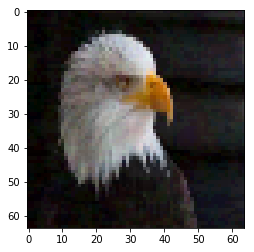

0.37873957
Val_Delete!\nacht.png


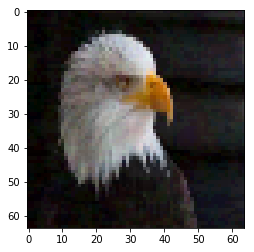

0.26024345
Val_Delete!\neon.png


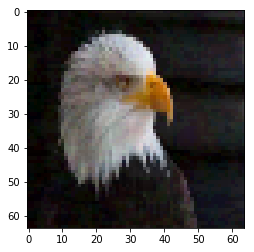

0.99380255
Val_Delete!\paris.png


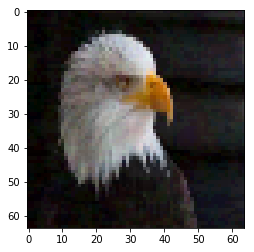

0.56224132
Val_Delete!\strand.png


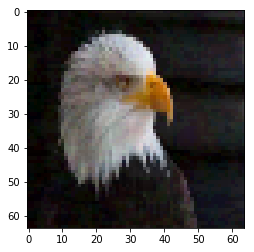

0.99968565
Val_Delete!\street.png


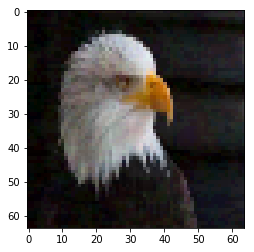

0.45961177
Val_Delete!\verbot.png


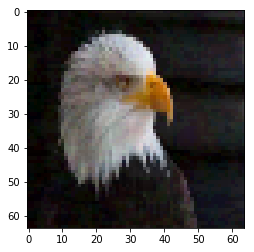

0.96777457
Val_Delete!\verbot2.png


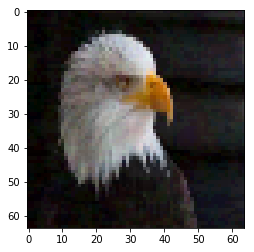

0.94223624
Val_Delete!\weihnacht.png


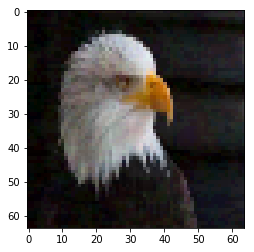

0.87855929
Val_Delete!\winter.png


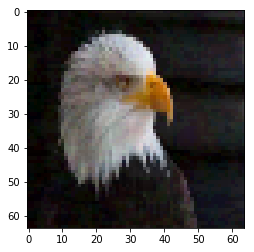

0.79485852
baseline confidence: 0.5831569316


In [50]:
convsum_base = 0
a = fgsm.FGSM(model=model)
a.print = False
imlist = glob("Val_Delete!\\*")

for imurl in imlist:
    conv = np.max(query_to_labels(imurl))
    print(imurl)
    convsum_base += conv
    im = url_to_im ("temp.png")
    plt.imshow(im)
    plt.show()
    print(conv)
        
print("baseline confidence: " + str(convsum_base/len(imlist)))


In [1]:
from utilities import query_to_text

In [2]:
for i in range(70):
    query_to_text("temp.png")
               

Query failed. Status code:
429 
Trying again
Query failed. Status code:
429 
Trying again
Query failed. Status code:
429 
Trying again
Query failed. Status code:
429 
Trying again
Query failed. Status code:
400 invalid PNG image


ServerError: Too many retries.400 invalid PNG image

In [3]:
name = "Adam_Sandler"

base_directory = "C:\\Users\\flodo\\Desktop\\Infocup_Data\\Adversarial_bases\\"
target_directory = "C:\\Users\\flodo\\Desktop\\Infocup_Data\\Advers_working\\"

imurl= base_directory+name+".png"
save_url=target_directory+name+".png"

fgsm.preview_im(imurl)
a.simple_attack(imurl,save_url)


Labels with highest confidence:
Vorfahrt (label 12): 0.44052419
Zulässige Höchstgeschwindigkeit (30) (label 1): 0.11033559
Baustelle (label 25): 0.07293988
Stoppschild (label 14): 0.06493238
Vorfahrt gewähren (label 13): 0.04811269
try attacking one of those labels!
attacking label 12

step: 1
MSE White vs Black Box before retraining:
0.0252857131031
MSE White vs Black Box after retraining:
0.012326393276453018
probability: Whitebox
0.993827760219574
probability: Blackbox
0.88649476

step: 2
MSE White vs Black Box before retraining:
0.0115203729361
MSE White vs Black Box after retraining:
0.011275384575128555
probability: Whitebox
0.9957209229469299
probability: Blackbox
0.90685701

step: 3
MSE White vs Black Box before retraining:
0.00789679502424
MSE White vs Black Box after retraining:
0.00775955431163311
probability: Whitebox
0.9955862760543823
probability: Blackbox
0.90741205

step: 4
MSE White vs Black Box before retraining:
0.00777469414029
MSE White vs Black Box after retrainin

0.91273910000000003

In [4]:
a.simple_attack(im, target_label, save_url, bound=15, mode="l_inf",target_threshold=0.9,max_inner_steps=30)

NameError: name 'im' is not defined

In [7]:
from os import remove
try:
    remove("3123123123123112")
except(FileNotFoundError):
    print(2)

2


In [3]:
a=StickerGenerator(pixelsize=7, fringe=17, stride=7) 
for i in range(43):
    a.make_sticker(i,title="7_block")

Confidence for Sticker on label 2: 0.01730714
Confidence for Sticker on label 3: 0.90082157
Sticker saved under Quickstick\3\7_block_central0.010.90082157.png
Confidence for Sticker on label 4: 0.09539092
Confidence for Sticker on label 8: 0.99852258
Sticker saved under Quickstick\8\7_block_central0.010.99852258.png
Confidence for Sticker on label 9: 0.07509521
Confidence for Sticker on label 10: 0.9399305
Sticker saved under Quickstick\10\7_block_central0.010.9399305.png
Confidence for Sticker on label 13: 0.02406728
Confidence for Sticker on label 14: 0.29954457
Confidence for Sticker on label 17: 0.9982937
Sticker saved under Quickstick\17\7_block_central0.010.9982937.png
Confidence for Sticker on label 18: 0.01623129
Confidence for Sticker on label 19: 0.02638045
Confidence for Sticker on label 22: 0.03525138
Confidence for Sticker on label 25: 0.98064834
Sticker saved under Quickstick\25\7_block_central0.010.98064834.png
Confidence for Sticker on label 31: 0.01024869
Confidence fo

In [4]:
print(a.queries)

30


In [5]:
sticker.sticker_attack("C:\\Users\\flodo\\Desktop\\Infocup_Data\\Adversarial_bases\\Zaini_Abdullah.png","C:\\Users\\flodo\\Desktop\\Infocup_Data\\Advers_working\\Zaini_Abdullah_stick.png",label=10)

0.99999678


In [5]:
5/1.2

4.166666666666667

In [7]:
import tkinter